#Assignment 1: Advanced Machine Learning
## Tom Scarberry

#Executive Summary

Table of Results

---



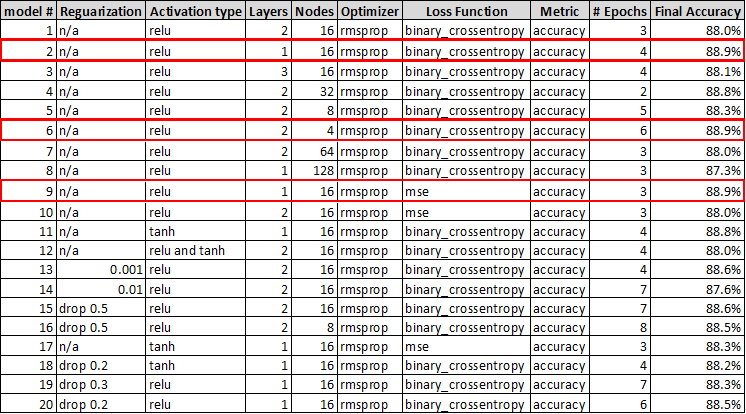

After running 20 different model iterations, the top three performing models are highlighted on the summary table above.  The model that is recommended is the model #2 which uses the relu activation function with 1 layer of 16 nodes that applies the rmsprop optimizer, binary crossentropy loss function, accuracy metric with 4 epochs.  This resulted in a 88.9% accuracy in predicting correctly if the movie had a positive or negative review based on the text included in the movie review.  

The models tended to overfit very quickly when the complexity level of the model was higher (e.g. more layer and nodes included in the model).  Thus simplier models were better at accurately predicting results for the movie reviews as they were able to appropriately generalize the learning without overlearning the test data (learning the noise in the data).

As an example of a more complex model quickly overfitting - model #8 had only one layer but used 128 nodes and this increase in the number of nodes resuled in requiring only 3 epochs to learn and overfit the training data.  The result of this overfitting lead to the lowest accuracy of all models tested when it only correclty predicted positive or negative reviews 87.3% of the time. 

The base learning compile steps were consistent across most models: rmsprop optimizer, binary crossentropy loss function, accuracy metric.  The one variation was applying the mse loss funtion instead of binary crossentrophy.  The mse loss function had the same results on the final model as using the binary cross entropy loss function, which was expected as it is applies the same basic logic in a less time efficient manner than the binary crossentropy loss function.  

Regularization offered mild improvents over some of the non-regularized models, but did not improve results over several of the base models that were of lower complexity (e.g. the chosen model as well as model 6, 9, 4, and 11).

In [1]:
import keras
keras.__version__

'2.4.3'

Download the imdb dataset from keras

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
max([max(sequence) for sequence in train_data])

9999

Convert the data into tensors

In [4]:
import numpy as np
def vectorize_sequences (sequences, dimensions=10000):
  results=np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)



In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Format the labels

In [6]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asanyarray(test_labels).astype('float32')

Create validation set of 10,00 samples from original training data

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Run model with validation data to determine the hyper parameter setting to apply for the number of epochs for the model

In [ ]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5887 - acc: 0.7194 - val_loss: 0.4162 - val_acc: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3363 - acc: 0.8966 - val_loss: 0.3078 - val_acc: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2361 - acc: 0.9243 - val_loss: 0.2798 - val_acc: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1837 - acc: 0.9401 - val_loss: 0.2859 - val_acc: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1510 - acc: 0.9541 - val_loss: 0.2848 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1270 - acc: 0.9610 - val_loss: 0.3084 - val_acc: 0.8782
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1041 - acc: 0.9710 - val_loss: 0.3665 - val_acc: 0.8658
Epoch 8/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0901 - a

Plot training and validation loss to determine optimal epoch for modelling - 3 epochs is optimal value

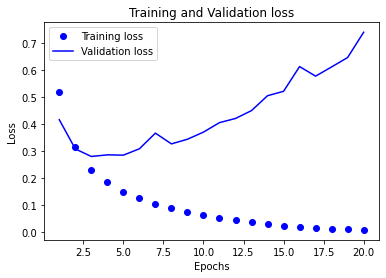

In [ ]:


import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Run first base model with 2 layers and 16 nodes - accuracy is 88.0%

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.5689 - accuracy: 0.7346
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.3013 - accuracy: 0.9011
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2974 - accuracy: 0.8796


[0.29739418625831604, 0.8795999884605408]

Remove layer and re-evaluate the number of epochs - 4 epochs optimal for one layer

In [ ]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5803 - acc: 0.7268 - val_loss: 0.3988 - val_acc: 0.8673
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3444 - acc: 0.8996 - val_loss: 0.3270 - val_acc: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2602 - acc: 0.9234 - val_loss: 0.3012 - val_acc: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2101 - acc: 0.9409 - val_loss: 0.2815 - val_acc: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1768 - acc: 0.9502 - val_loss: 0.2776 - val_acc: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1511 - acc: 0.9573 - val_loss: 0.2744 - val_acc: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1343 - acc: 0.9615 - val_loss: 0.2826 - val_acc: 0.8880
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1190 - a

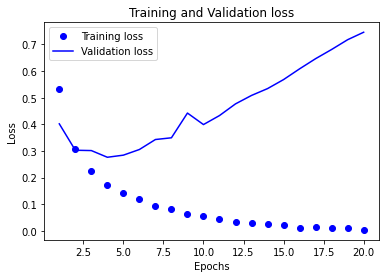

In [ ]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Remove a layer and re run the model with 4 epochs - accuracy improved to 88.9%

In [52]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5414 - accuracy: 0.7716
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.3017 - accuracy: 0.9008
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2311 - accuracy: 0.9238
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2805 - accuracy: 0.8886


[0.2804912030696869, 0.8885999917984009]

3 layers with 16 nodes and re run the model - 4 epochs optimal

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6066 - acc: 0.7038 - val_loss: 0.4017 - val_acc: 0.8580
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3225 - acc: 0.9057 - val_loss: 0.3025 - val_acc: 0.8886
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2218 - acc: 0.9318 - val_loss: 0.3013 - val_acc: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1661 - acc: 0.9495 - val_loss: 0.2761 - val_acc: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1355 - acc: 0.9584 - val_loss: 0.2840 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1092 - acc: 0.9682 - val_loss: 0.3053 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0855 - acc: 0.9777 - val_loss: 0.3428 - val_acc: 0.8774
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0776 - a

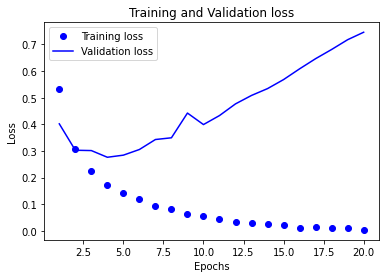

In [ ]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

3 layers with 16 nodes  - 88.1% accuracy

In [ ]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16,activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5911 - accuracy: 0.7058
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2734 - accuracy: 0.9131
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1960 - accuracy: 0.9324
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3031 - accuracy: 0.8814


[0.3030967712402344, 0.8813599944114685]

2 layers with 32 nodes - 2 epochs optimal

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5674 - acc: 0.7122 - val_loss: 0.3406 - val_acc: 0.8778
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2801 - acc: 0.9082 - val_loss: 0.2835 - val_acc: 0.8905
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1873 - acc: 0.9400 - val_loss: 0.2742 - val_acc: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1525 - acc: 0.9502 - val_loss: 0.3321 - val_acc: 0.8715
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1215 - acc: 0.9604 - val_loss: 0.3266 - val_acc: 0.8765
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0918 - acc: 0.9722 - val_loss: 0.3391 - val_acc: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0726 - acc: 0.9786 - val_loss: 0.3463 - val_acc: 0.8805
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0541 - a

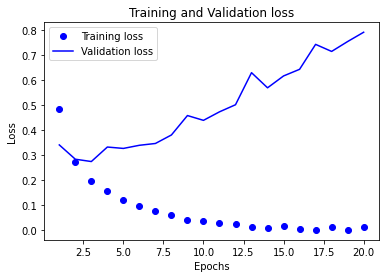

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2 layers with 32 nodes - accuracy 88.8%

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=2,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 32ms/step - loss: 0.5313 - accuracy: 0.7455
Epoch 2/2
782/782 [==============================] - 1s 2ms/step - loss: 0.2828 - accuracy: 0.8878


[0.2827671766281128, 0.8877599835395813]

2 layers with 8 units - 5 epochs optimal

Epoch 1/10
30/30 [==============================] - 3s 62ms/step - loss: 0.6132 - acc: 0.6878 - val_loss: 0.4444 - val_acc: 0.8510
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.3897 - acc: 0.8889 - val_loss: 0.3482 - val_acc: 0.8823
Epoch 3/10
30/30 [==============================] - 1s 35ms/step - loss: 0.2803 - acc: 0.9236 - val_loss: 0.2990 - val_acc: 0.8896
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.2189 - acc: 0.9350 - val_loss: 0.2826 - val_acc: 0.8882
Epoch 5/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1770 - acc: 0.9477 - val_loss: 0.2758 - val_acc: 0.8907
Epoch 6/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1514 - acc: 0.9545 - val_loss: 0.2809 - val_acc: 0.8865
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1255 - acc: 0.9633 - val_loss: 0.2833 - val_acc: 0.8891
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1065 - a

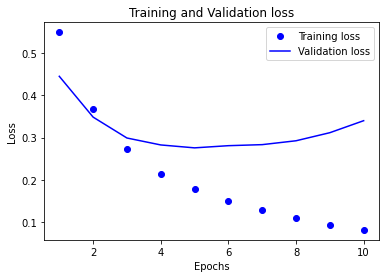

In [33]:
model=keras.Sequential([
                        layers.Dense(8, activation='relu'),
                        layers.Dense(8, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2 layers with 8 units - 88.3%

In [34]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(8, activation='relu'),
                        layers.Dense(8, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=5,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/5
49/49 [==============================] - 2s 27ms/step - loss: 0.6017 - accuracy: 0.6656
Epoch 2/5
49/49 [==============================] - 1s 27ms/step - loss: 0.3237 - accuracy: 0.8990
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2336 - accuracy: 0.9243
Epoch 4/5
49/49 [==============================] - 1s 27ms/step - loss: 0.1901 - accuracy: 0.9376
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2929 - accuracy: 0.8829


[0.2928878664970398, 0.8828799724578857]

2 layers with 4 units - 6 epochs

Epoch 1/10
30/30 [==============================] - 2s 42ms/step - loss: 0.6297 - acc: 0.6577 - val_loss: 0.5213 - val_acc: 0.7855
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.4732 - acc: 0.8525 - val_loss: 0.4425 - val_acc: 0.8347
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 0.3812 - acc: 0.9002 - val_loss: 0.3767 - val_acc: 0.8698
Epoch 4/10
30/30 [==============================] - 1s 34ms/step - loss: 0.3047 - acc: 0.9219 - val_loss: 0.3364 - val_acc: 0.8816
Epoch 5/10
30/30 [==============================] - 1s 33ms/step - loss: 0.2493 - acc: 0.9372 - val_loss: 0.3043 - val_acc: 0.8876
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2091 - acc: 0.9477 - val_loss: 0.2886 - val_acc: 0.8894
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.1842 - acc: 0.9542 - val_loss: 0.2832 - val_acc: 0.8877
Epoch 8/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1582 - a

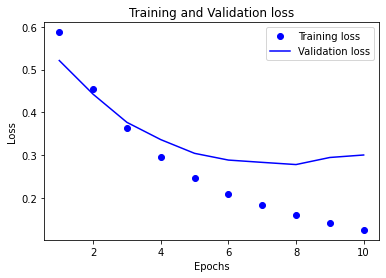

In [35]:
model=keras.Sequential([
                        layers.Dense(4, activation='relu'),
                        layers.Dense(4, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


2 layers with 4 units - 88.9% accuracy

In [38]:
model=keras.Sequential([
                        layers.Dense(4, activation='relu'),
                        layers.Dense(4, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=6,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/6
49/49 [==============================] - 2s 27ms/step - loss: 0.6279 - accuracy: 0.6885
Epoch 2/6
49/49 [==============================] - 1s 27ms/step - loss: 0.4139 - accuracy: 0.8825
Epoch 3/6
49/49 [==============================] - 1s 27ms/step - loss: 0.3148 - accuracy: 0.9042
Epoch 4/6
49/49 [==============================] - 1s 27ms/step - loss: 0.2511 - accuracy: 0.9209
Epoch 5/6
49/49 [==============================] - 1s 28ms/step - loss: 0.2098 - accuracy: 0.9308
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2793 - accuracy: 0.8888


[0.27925464510917664, 0.8888400197029114]

2 layers with 64 nodes - 3 epochs optimal

Epoch 1/10
30/30 [==============================] - 2s 64ms/step - loss: 0.5632 - acc: 0.7329 - val_loss: 0.3221 - val_acc: 0.8800
Epoch 2/10
30/30 [==============================] - 2s 56ms/step - loss: 0.2603 - acc: 0.9056 - val_loss: 0.2955 - val_acc: 0.8816
Epoch 3/10
30/30 [==============================] - 2s 56ms/step - loss: 0.1810 - acc: 0.9368 - val_loss: 0.2947 - val_acc: 0.8816
Epoch 4/10
30/30 [==============================] - 2s 55ms/step - loss: 0.1332 - acc: 0.9540 - val_loss: 0.3664 - val_acc: 0.8675
Epoch 5/10
30/30 [==============================] - 2s 56ms/step - loss: 0.1051 - acc: 0.9643 - val_loss: 0.3179 - val_acc: 0.8834
Epoch 6/10
30/30 [==============================] - 2s 56ms/step - loss: 0.0686 - acc: 0.9805 - val_loss: 0.3711 - val_acc: 0.8788
Epoch 7/10
30/30 [==============================] - 2s 55ms/step - loss: 0.0502 - acc: 0.9855 - val_loss: 0.4024 - val_acc: 0.8753
Epoch 8/10
30/30 [==============================] - 2s 55ms/step - loss: 0.0340 - a

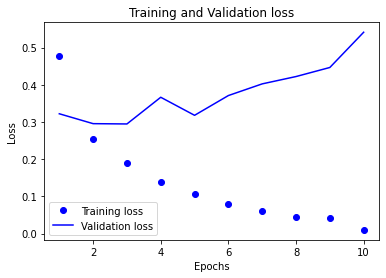

In [ ]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(64, activation='relu'),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Two layers with 64 nodes - accuracy 88.0%

In [ ]:
model=keras.Sequential([
                        layers.Dense(64, activation='relu'),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/3
49/49 [==============================] - 3s 42ms/step - loss: 0.5330 - accuracy: 0.7153
Epoch 2/3
49/49 [==============================] - 2s 42ms/step - loss: 0.2399 - accuracy: 0.9094
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3017 - accuracy: 0.8803


[0.30169740319252014, 0.8803200125694275]

One layer with 128 - 3 epochs optimal

Epoch 1/10
30/30 [==============================] - 3s 99ms/step - loss: 0.5549 - acc: 0.7039 - val_loss: 0.3817 - val_acc: 0.8364
Epoch 2/10
30/30 [==============================] - 3s 87ms/step - loss: 0.2693 - acc: 0.8988 - val_loss: 0.3517 - val_acc: 0.8511
Epoch 3/10
30/30 [==============================] - 3s 86ms/step - loss: 0.1915 - acc: 0.9359 - val_loss: 0.2741 - val_acc: 0.8909
Epoch 4/10
30/30 [==============================] - 3s 88ms/step - loss: 0.1392 - acc: 0.9559 - val_loss: 0.2868 - val_acc: 0.8882
Epoch 5/10
30/30 [==============================] - 3s 87ms/step - loss: 0.1098 - acc: 0.9682 - val_loss: 0.2929 - val_acc: 0.8841
Epoch 6/10
30/30 [==============================] - 3s 87ms/step - loss: 0.0898 - acc: 0.9730 - val_loss: 0.3995 - val_acc: 0.8553
Epoch 7/10
30/30 [==============================] - 3s 87ms/step - loss: 0.0748 - acc: 0.9788 - val_loss: 0.3436 - val_acc: 0.8816
Epoch 8/10
30/30 [==============================] - 3s 88ms/step - loss: 0.0535 - a

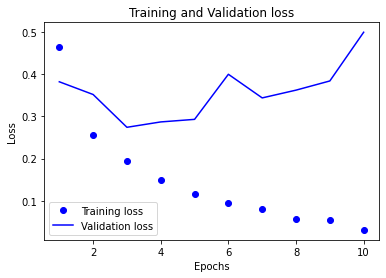

In [11]:
from keras import models
from keras import layers
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(128, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))


import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

One layer with 128 - 87.3% accuracy

In [12]:
from tensorflow import keras
model=keras.Sequential([
                        layers.Dense(128, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/3
49/49 [==============================] - 4s 70ms/step - loss: 0.5242 - accuracy: 0.7359
Epoch 2/3
49/49 [==============================] - 3s 69ms/step - loss: 0.2313 - accuracy: 0.9150
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.3183 - accuracy: 0.8736


[0.3183252513408661, 0.8736000061035156]

Change loss function to mse with 1 layer 16 nodes - 3 epochs

Epoch 1/10
30/30 [==============================] - 2s 42ms/step - loss: 0.1951 - acc: 0.7155 - val_loss: 0.1241 - val_acc: 0.8567
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0983 - acc: 0.9006 - val_loss: 0.0981 - val_acc: 0.8812
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0707 - acc: 0.9300 - val_loss: 0.0902 - val_acc: 0.8846
Epoch 4/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0553 - acc: 0.9476 - val_loss: 0.0885 - val_acc: 0.8831
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0455 - acc: 0.9586 - val_loss: 0.0891 - val_acc: 0.8788
Epoch 6/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0392 - acc: 0.9633 - val_loss: 0.0831 - val_acc: 0.8869
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0325 - acc: 0.9735 - val_loss: 0.0842 - val_acc: 0.8825
Epoch 8/10
30/30 [==============================] - 1s 34ms/step - loss: 0.0294 - a

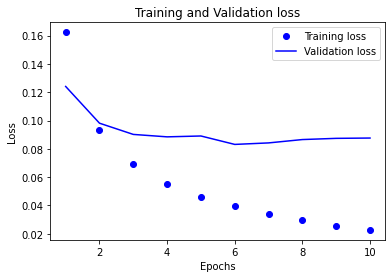

In [13]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='mse',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1 layer mse function - accuracy 88.9%

In [14]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.1763 - accuracy: 0.7480
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.0808 - accuracy: 0.9138
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0851 - accuracy: 0.8888


[0.08512458205223083, 0.888759970664978]

2 layer mse function - 3 epochs

Epoch 1/10
30/30 [==============================] - 2s 41ms/step - loss: 0.2001 - acc: 0.7120 - val_loss: 0.1198 - val_acc: 0.8644
Epoch 2/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0950 - acc: 0.9038 - val_loss: 0.0959 - val_acc: 0.8794
Epoch 3/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0646 - acc: 0.9339 - val_loss: 0.0852 - val_acc: 0.8912
Epoch 4/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0471 - acc: 0.9539 - val_loss: 0.0909 - val_acc: 0.8768
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0377 - acc: 0.9630 - val_loss: 0.0904 - val_acc: 0.8762
Epoch 6/10
30/30 [==============================] - 1s 33ms/step - loss: 0.0313 - acc: 0.9711 - val_loss: 0.0845 - val_acc: 0.8853
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0242 - acc: 0.9780 - val_loss: 0.0888 - val_acc: 0.8784
Epoch 8/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0216 - a

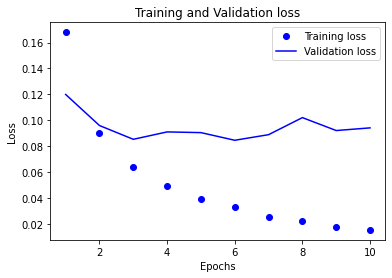

In [15]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='mse',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2 layer mse function - accuracy 88.0%

In [16]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='relu'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.1857 - accuracy: 0.7399
Epoch 2/3
49/49 [==============================] - 1s 27ms/step - loss: 0.0801 - accuracy: 0.9095
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0895 - accuracy: 0.8795


[0.08949937671422958, 0.8795199990272522]

Use tanh activation function - 4 epochs

Epoch 1/10
30/30 [==============================] - 2s 60ms/step - loss: 0.5658 - acc: 0.7164 - val_loss: 0.3835 - val_acc: 0.8694
Epoch 2/10
30/30 [==============================] - 1s 37ms/step - loss: 0.3199 - acc: 0.9076 - val_loss: 0.3146 - val_acc: 0.8872
Epoch 3/10
30/30 [==============================] - 1s 35ms/step - loss: 0.2456 - acc: 0.9278 - val_loss: 0.2880 - val_acc: 0.8883
Epoch 4/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1919 - acc: 0.9449 - val_loss: 0.2741 - val_acc: 0.8909
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1665 - acc: 0.9524 - val_loss: 0.2712 - val_acc: 0.8904
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1399 - acc: 0.9601 - val_loss: 0.2871 - val_acc: 0.8843
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.1199 - acc: 0.9670 - val_loss: 0.2805 - val_acc: 0.8866
Epoch 8/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1006 - a

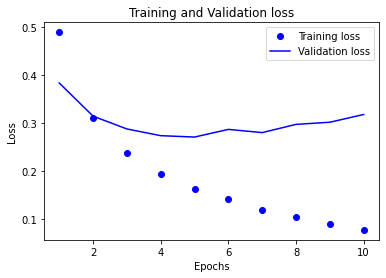

In [17]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Use tanh activation function - accuracy 88.8%

In [18]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5320 - accuracy: 0.7544
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2921 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2209 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2783 - accuracy: 0.8879


[0.2782684862613678, 0.8879200220108032]

Use relu and tanh activaiton functions - 4 epochs



Epoch 1/10
30/30 [==============================] - 2s 40ms/step - loss: 0.5835 - acc: 0.7187 - val_loss: 0.3849 - val_acc: 0.8691
Epoch 2/10
30/30 [==============================] - 1s 32ms/step - loss: 0.3239 - acc: 0.9058 - val_loss: 0.3138 - val_acc: 0.8820
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2287 - acc: 0.9329 - val_loss: 0.2817 - val_acc: 0.8889
Epoch 4/10
30/30 [==============================] - 1s 32ms/step - loss: 0.1726 - acc: 0.9481 - val_loss: 0.2712 - val_acc: 0.8914
Epoch 5/10
30/30 [==============================] - 1s 32ms/step - loss: 0.1342 - acc: 0.9615 - val_loss: 0.2784 - val_acc: 0.8888
Epoch 6/10
30/30 [==============================] - 1s 32ms/step - loss: 0.1014 - acc: 0.9752 - val_loss: 0.3248 - val_acc: 0.8740
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0799 - acc: 0.9803 - val_loss: 0.3153 - val_acc: 0.8816
Epoch 8/10
30/30 [==============================] - 1s 32ms/step - loss: 0.0618 - a

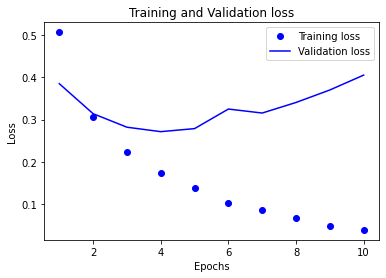

In [19]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Use relu and tanh activaiton functions - accuracy 88.0%

In [20]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.5300 - accuracy: 0.7459
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2559 - accuracy: 0.9156
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1867 - accuracy: 0.9353
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3025 - accuracy: 0.8799


[0.30247732996940613, 0.8798800110816956]

Regularization with 0.001 weight coefficient - 4 epochs

Epoch 1/10
30/30 [==============================] - 2s 51ms/step - loss: 0.6578 - acc: 0.6873 - val_loss: 0.4548 - val_acc: 0.8679
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.4008 - acc: 0.8908 - val_loss: 0.3677 - val_acc: 0.8871
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.3042 - acc: 0.9218 - val_loss: 0.3488 - val_acc: 0.8827
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.2694 - acc: 0.9262 - val_loss: 0.3339 - val_acc: 0.8879
Epoch 5/10
30/30 [==============================] - 1s 36ms/step - loss: 0.2357 - acc: 0.9411 - val_loss: 0.3315 - val_acc: 0.8874
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.2170 - acc: 0.9498 - val_loss: 0.3452 - val_acc: 0.8846
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.2036 - acc: 0.9540 - val_loss: 0.3505 - val_acc: 0.8806
Epoch 8/10
30/30 [==============================] - 1s 37ms/step - loss: 0.1964 - a

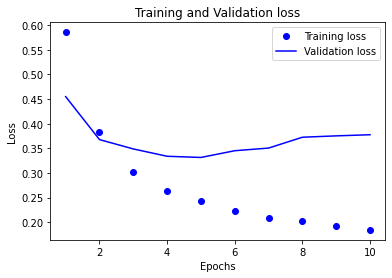

In [27]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Regularization with 0.001 weight coefficient - accuracy 88.6%

In [28]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.5902 - accuracy: 0.7484
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.3296 - accuracy: 0.9049
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2732 - accuracy: 0.9217
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3362 - accuracy: 0.8858


[0.3361796736717224, 0.8858399987220764]

Regularization with 0.01 weight coefficient - 7 epochs

Epoch 1/10
30/30 [==============================] - 2s 48ms/step - loss: 0.9012 - acc: 0.6884 - val_loss: 0.6362 - val_acc: 0.8484
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.5924 - acc: 0.8747 - val_loss: 0.5596 - val_acc: 0.8633
Epoch 3/10
30/30 [==============================] - 1s 37ms/step - loss: 0.5180 - acc: 0.8958 - val_loss: 0.5264 - val_acc: 0.8630
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.4742 - acc: 0.9022 - val_loss: 0.4881 - val_acc: 0.8807
Epoch 5/10
30/30 [==============================] - 1s 37ms/step - loss: 0.4404 - acc: 0.9132 - val_loss: 0.5063 - val_acc: 0.8525
Epoch 6/10
30/30 [==============================] - 1s 37ms/step - loss: 0.4224 - acc: 0.9077 - val_loss: 0.4738 - val_acc: 0.8695
Epoch 7/10
30/30 [==============================] - 1s 37ms/step - loss: 0.4061 - acc: 0.9162 - val_loss: 0.4469 - val_acc: 0.8832
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.3935 - a

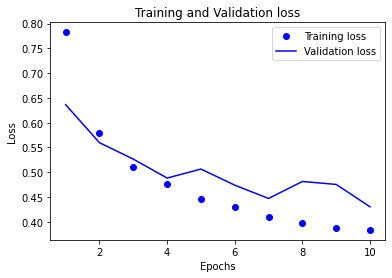

In [31]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Regularization with 0.01 weight coefficient - 87.6% accuracy

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/7
49/49 [==============================] - 2s 31ms/step - loss: 0.8332 - accuracy: 0.7444
Epoch 2/7
49/49 [==============================] - 2s 32ms/step - loss: 0.5530 - accuracy: 0.8760
Epoch 3/7
49/49 [==============================] - 2s 31ms/step - loss: 0.4846 - accuracy: 0.8898
Epoch 4/7
49/49 [==============================] - 2s 31ms/step - loss: 0.4528 - accuracy: 0.8926
Epoch 5/7
49/49 [==============================] - 2s 31ms/step - loss: 0.4274 - accuracy: 0.8992
Epoch 6/7
49/49 [==============================] - 2s 32ms/step - loss: 0.4151 - accuracy: 0.8970
Epoch 7/7
782/782 [==============================] - 2s 2ms/step - loss: 0.4426 - accuracy: 0.8761


[0.44256266951560974, 0.8761199712753296]

Dropout 2 layers 16 units - 7 epochs

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6544 - acc: 0.5875 - val_loss: 0.4952 - val_acc: 0.8470
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5116 - acc: 0.7608 - val_loss: 0.3929 - val_acc: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4252 - acc: 0.8263 - val_loss: 0.3361 - val_acc: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3659 - acc: 0.8658 - val_loss: 0.3076 - val_acc: 0.8795
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3104 - acc: 0.8934 - val_loss: 0.2822 - val_acc: 0.8922
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2770 - acc: 0.9090 - val_loss: 0.2864 - val_acc: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2416 - acc: 0.9221 - val_loss: 0.2768 - val_acc: 0.8931
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2151 - a

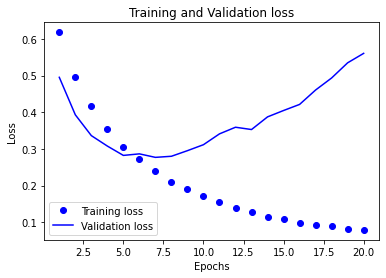

In [49]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dropout 2 layers 16 units - 88.6% accuracy



In [50]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=7,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/7
49/49 [==============================] - 2s 28ms/step - loss: 0.6489 - accuracy: 0.5994
Epoch 2/7
49/49 [==============================] - 1s 29ms/step - loss: 0.4897 - accuracy: 0.7751
Epoch 3/7
49/49 [==============================] - 1s 28ms/step - loss: 0.3887 - accuracy: 0.8397
Epoch 4/7
49/49 [==============================] - 1s 29ms/step - loss: 0.3214 - accuracy: 0.8832
Epoch 5/7
49/49 [==============================] - 1s 28ms/step - loss: 0.2724 - accuracy: 0.9042
Epoch 6/7
49/49 [==============================] - 1s 28ms/step - loss: 0.2408 - accuracy: 0.9192
Epoch 7/7
782/782 [==============================] - 2s 2ms/step - loss: 0.3015 - accuracy: 0.8861


[0.30151981115341187, 0.8860800266265869]

Dropout 2 layers 8 units - 8 epochs

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6835 - acc: 0.5593 - val_loss: 0.6367 - val_acc: 0.6779
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6276 - acc: 0.6758 - val_loss: 0.5343 - val_acc: 0.8518
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5594 - acc: 0.7434 - val_loss: 0.4631 - val_acc: 0.8649
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5141 - acc: 0.7780 - val_loss: 0.4230 - val_acc: 0.8577
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4719 - acc: 0.8019 - val_loss: 0.3744 - val_acc: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4381 - acc: 0.8249 - val_loss: 0.3486 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4012 - acc: 0.8514 - val_loss: 0.3275 - val_acc: 0.8877
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3739 - a

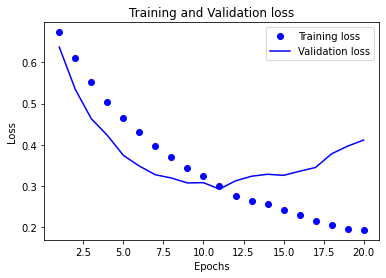

In [42]:
model=keras.Sequential([
                        layers.Dense(8, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(8, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(1, activation='sigmoid')
                        ])
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

results

import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dropout 2 layers 8 units - 88.5% accuracy

In [47]:
model=keras.Sequential([
                        layers.Dense(8, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(8, activation='relu'),
                        layers.Dropout(0.5),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train, epochs=11,batch_size=512)
results=model.evaluate(x_test,y_test)

results

Epoch 1/11
49/49 [==============================] - 2s 26ms/step - loss: 0.6492 - accuracy: 0.6093
Epoch 2/11
49/49 [==============================] - 1s 26ms/step - loss: 0.5296 - accuracy: 0.7416
Epoch 3/11
49/49 [==============================] - 1s 27ms/step - loss: 0.4632 - accuracy: 0.7929
Epoch 4/11
49/49 [==============================] - 1s 26ms/step - loss: 0.4158 - accuracy: 0.8214
Epoch 5/11
49/49 [==============================] - 1s 26ms/step - loss: 0.3753 - accuracy: 0.8483
Epoch 6/11
49/49 [==============================] - 1s 26ms/step - loss: 0.3438 - accuracy: 0.8674
Epoch 7/11
49/49 [==============================] - 1s 26ms/step - loss: 0.3204 - accuracy: 0.8794
Epoch 8/11
49/49 [==============================] - 1s 26ms/step - loss: 0.3072 - accuracy: 0.8821
Epoch 9/11
49/49 [==============================] - 1s 26ms/step - loss: 0.2997 - accuracy: 0.8842
Epoch 10/11
49/49 [==============================] - 1s 26ms/step - loss: 0.2804 - accuracy: 0.8937
Epoch 11/

[0.3127186596393585, 0.885200023651123]

1 layer tanh with mse - 3 epochs

Epoch 1/10
30/30 [==============================] - 2s 46ms/step - loss: 0.1933 - acc: 0.7089 - val_loss: 0.1200 - val_acc: 0.8705
Epoch 2/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0977 - acc: 0.9105 - val_loss: 0.0984 - val_acc: 0.8835
Epoch 3/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0724 - acc: 0.9281 - val_loss: 0.0872 - val_acc: 0.8923
Epoch 4/10
30/30 [==============================] - 1s 37ms/step - loss: 0.0553 - acc: 0.9469 - val_loss: 0.0851 - val_acc: 0.8883
Epoch 5/10
30/30 [==============================] - 1s 35ms/step - loss: 0.0461 - acc: 0.9557 - val_loss: 0.0825 - val_acc: 0.8903
Epoch 6/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0364 - acc: 0.9693 - val_loss: 0.0864 - val_acc: 0.8824
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0306 - acc: 0.9736 - val_loss: 0.0870 - val_acc: 0.8797
Epoch 8/10
30/30 [==============================] - 1s 36ms/step - loss: 0.0271 - a

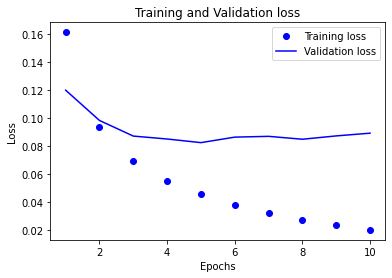

In [54]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='mse',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1 layer tanh with mse - 88.3% accuracy

In [57]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/3
49/49 [==============================] - 2s 28ms/step - loss: 0.1804 - accuracy: 0.7373
Epoch 2/3
49/49 [==============================] - 1s 29ms/step - loss: 0.0830 - accuracy: 0.9097
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0877 - accuracy: 0.8828


[0.08774594962596893, 0.8828399777412415]

1 layer tanh with drop out 16 nodes - 4 epochs

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5824 - acc: 0.7038 - val_loss: 0.4116 - val_acc: 0.8341
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3330 - acc: 0.8981 - val_loss: 0.3308 - val_acc: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2550 - acc: 0.9220 - val_loss: 0.2928 - val_acc: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1992 - acc: 0.9429 - val_loss: 0.2734 - val_acc: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1710 - acc: 0.9498 - val_loss: 0.2694 - val_acc: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1424 - acc: 0.9610 - val_loss: 0.2748 - val_acc: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1239 - acc: 0.9655 - val_loss: 0.2767 - val_acc: 0.8873
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1101 - a

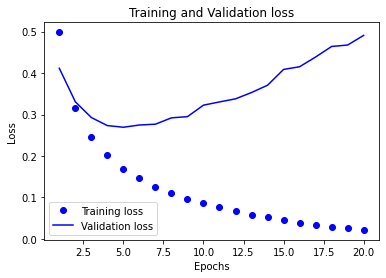

In [60]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dropout(0.2),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1 layer tanh with drop out 16 nodes - 88.2% accuracy

In [61]:
model=keras.Sequential([
                        layers.Dense(16, activation='tanh'),
                        layers.Dropout(0.2),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5294 - accuracy: 0.7548
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2852 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2169 - accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2896 - accuracy: 0.8819


[0.2896406352519989, 0.8819199800491333]

1 layer 16 nodes with 0.3 dropout - 7 epochs

Epoch 1/20
30/30 [==============================] - 3s 48ms/step - loss: 0.5851 - acc: 0.6864 - val_loss: 0.3902 - val_acc: 0.8622
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3467 - acc: 0.8834 - val_loss: 0.3205 - val_acc: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2741 - acc: 0.9075 - val_loss: 0.2935 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2328 - acc: 0.9226 - val_loss: 0.2767 - val_acc: 0.8916
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1909 - acc: 0.9399 - val_loss: 0.2756 - val_acc: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1702 - acc: 0.9485 - val_loss: 0.2733 - val_acc: 0.8904
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1472 - acc: 0.9567 - val_loss: 0.2743 - val_acc: 0.8906
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1300 - a

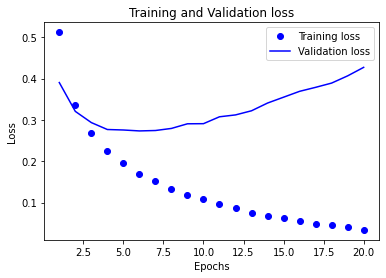

In [65]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.3),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1 layer 16 nodes with 0.3 dropout - 88.3% accuracy

In [66]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.3),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=7,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/7
49/49 [==============================] - 2s 28ms/step - loss: 0.5441 - accuracy: 0.7314
Epoch 2/7
49/49 [==============================] - 1s 28ms/step - loss: 0.3125 - accuracy: 0.8923
Epoch 3/7
49/49 [==============================] - 1s 29ms/step - loss: 0.2472 - accuracy: 0.9156
Epoch 4/7
49/49 [==============================] - 1s 28ms/step - loss: 0.2076 - accuracy: 0.9271
Epoch 5/7
49/49 [==============================] - 1s 28ms/step - loss: 0.1844 - accuracy: 0.9350
Epoch 6/7
49/49 [==============================] - 1s 28ms/step - loss: 0.1619 - accuracy: 0.9452
Epoch 7/7
782/782 [==============================] - 2s 2ms/step - loss: 0.2976 - accuracy: 0.8828


[0.2976113557815552, 0.8828399777412415]

1 layer 16 nodes with 0.2 dropout - 6 epochs

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5889 - acc: 0.6992 - val_loss: 0.3989 - val_acc: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3543 - acc: 0.8867 - val_loss: 0.3243 - val_acc: 0.8857
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2676 - acc: 0.9184 - val_loss: 0.2924 - val_acc: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2197 - acc: 0.9322 - val_loss: 0.2804 - val_acc: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1879 - acc: 0.9421 - val_loss: 0.2817 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1673 - acc: 0.9484 - val_loss: 0.2694 - val_acc: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1468 - acc: 0.9540 - val_loss: 0.2727 - val_acc: 0.8901
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1269 - a

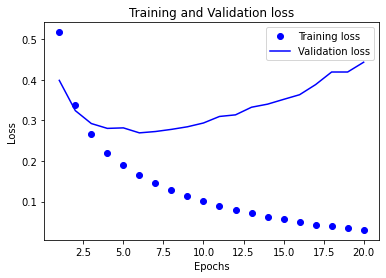

In [67]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.2),
                        layers.Dense(1, activation='sigmoid')
                        ])

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='acc')
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1 layer 16 nodes with 0.2 dropout - 88.5% accuracy

In [68]:
model=keras.Sequential([
                        layers.Dense(16, activation='relu'),
                        layers.Dropout(0.2),
                        layers.Dense(1, activation='sigmoid')
                        ])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=6,batch_size=512)
results=model.evaluate(x_test,y_test)
results

Epoch 1/6
49/49 [==============================] - 2s 28ms/step - loss: 0.5482 - accuracy: 0.7386
Epoch 2/6
49/49 [==============================] - 1s 28ms/step - loss: 0.3150 - accuracy: 0.8938
Epoch 3/6
49/49 [==============================] - 1s 28ms/step - loss: 0.2474 - accuracy: 0.9135
Epoch 4/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2105 - accuracy: 0.9286
Epoch 5/6
49/49 [==============================] - 1s 28ms/step - loss: 0.1817 - accuracy: 0.9391
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2875 - accuracy: 0.8849


[0.28746259212493896, 0.8849200010299683]